# Exploratory Data Analysis
In this notebook we perform an initial assessment of the data provided. 
We start by inspecting the format of the data, and the data properly.
We then focus on the distribution of the target variable.

### TL;DR
- File inspection
    - The data provided does not contain missing values
    - The dataset consists of 1,031,284 samples, each containing 47 features
- Exploratory analysis
    - Data Profiling: please refer to the accompanying `data_profiling.html` document
    -

In [1]:
import pprint
from collections import Counter

import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot

from utils import read_data, logit

%matplotlib inline

pp = pprint.PrettyPrinter(indent=2)

In [2]:
PATH_DATA_FILE = '../data/data.csv'

## 0. File inspection
We haven't been given much information regarding the format of the data, beyond it being a CSV file with '-'-separated features. The simple character inspection below indicates that there are no characters other than new lines, parentheses, commas, dots, dashes and the 10 digits. In particular, no alphabetic characters or symbols representing missing values. Hence, we can safely assume all features are numeric. From the numbers obtained (see below) there are no negative values in the features.

In [3]:
%%time

with open(PATH_DATA_FILE, 'r') as f:
    character_counter = Counter(f.read())
    
pp.pprint(character_counter)
del character_counter

Counter({ '0': 90771693,
          '.': 48470348,
          '-': 47439064,
          '1': 6778796,
          ',': 3093852,
          '2': 2941695,
          '3': 2062307,
          '4': 1614121,
          '5': 1324753,
          '6': 1197074,
          '7': 1107993,
          '8': 1059618,
          '9': 1058084,
          '(': 1031284,
          ')': 1031284,
          '\n': 1031284})
CPU times: user 17.3 s, sys: 518 ms, total: 17.8 s
Wall time: 23.9 s


## 1. Data Inspection

In [4]:
%%time

df = read_data(PATH_DATA_FILE)

rows, cols = df.shape
print(f'Dataframe loaded. {rows} rows and {cols} columns')

Dataframe loaded. 1031284 rows and 50 columns
CPU times: user 49.5 s, sys: 2.29 s, total: 51.8 s
Wall time: 58 s


In [5]:
# Target variable (and its logit)
MAX_VAL = 3

df['completion_rate'] = df['submissions'] / df['views']
df['logit_completion_rate'] = logit(df['completion_rate'], MAX_VAL)

/Users/yc00055/dev/tfcc/prototyping/utils.py:43: RuntimeWarning: divide by zero encountered in log
  return np.clip(np.log(y / (1 - y)) / (1 + np.exp(-y)), -cap, cap)


In [6]:
# Engineered features
features = [c for c in df.columns if c.split('_')[0] == 'feat']
df['feat_sum'] = df[features].sum(axis=1)
df['feat_zeros'] = (df[features] == 0).sum(axis=1)
df['feat_above_one'] = (df[features] > 1).sum(axis=1)

In [7]:
df.head()

form_id  views  submissions  feat_01  feat_02  feat_03  feat_04  feat_05  \
0  1113027     33           27      0.0      0.0      0.0      0.0      0.0   
1  1115313    147          111      0.0      2.0      0.0      0.0      0.0   
2  1115907    528          136      0.0      1.0      0.0      0.0      1.0   
3  1116299     55           21      0.0      2.0      0.0      0.0      0.0   
4  1120373     62           54      0.0      0.0      0.0      0.0      1.0   

   feat_06  feat_07  ...  feat_43  feat_44  feat_45  feat_46  feat_47  \
0      0.0      1.0  ...      0.0      0.0      2.0      1.0      2.0   
1      0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
2      0.0      6.0  ...      1.0      0.0      0.0      0.0     30.0   
3      1.0      2.0  ...      0.0      0.0      0.0      0.0      7.0   
4      0.0      4.0  ...      1.0      1.0     11.0      7.0     21.0   

   completion_rate  logit_completion_rate  feat_sum  feat_zeros  \
0         0.818182               1.043604      11.0          40   
1         0.755102               0.766014       9.0          43   
2         0.257576              -0.597097      76.0          33   
3         0.381818              -0.286362      34.0          34   
4         0.870968               1.346126      67.0          33   

   feat_above_one  
0               4  
1               3  
2               7  
3               8  
4               8  

[5 rows x 55 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031284 entries, 0 to 1031283
Data columns (total 55 columns):
form_id                  1031284 non-null object
views                    1031284 non-null int64
submissions              1031284 non-null int64
feat_01                  1031284 non-null float64
feat_02                  1031284 non-null float64
feat_03                  1031284 non-null float64
feat_04                  1031284 non-null float64
feat_05                  1031284 non-null float64
feat_06                  1031284 non-null float64
feat_07                  1031284 non-null float64
feat_08                  1031284 non-null float64
feat_09                  1031284 non-null float64
feat_10                  1031284 non-null float64
feat_11                  1031284 non-null float64
feat_12                  1031284 non-null float64
feat_13                  1031284 non-null float64
feat_14                  1031284 non-null float64
feat_15                  1031284 non-null 

In [9]:
%%time

df.describe().transpose()

CPU times: user 2.65 s, sys: 394 ms, total: 3.04 s
Wall time: 3.83 s


count        mean           std   min        25%  \
views                  1031284.0  939.554120  26748.709355   1.0  36.000000   
submissions            1031284.0  322.413199   8507.656415   0.0  17.000000   
feat_01                1031284.0    0.195451      0.396548   0.0   0.000000   
feat_02                1031284.0    0.374912      0.933426   0.0   0.000000   
feat_03                1031284.0    0.054973      0.440341   0.0   0.000000   
feat_04                1031284.0    0.001025      0.033071   0.0   0.000000   
feat_05                1031284.0    0.144949      0.480263   0.0   0.000000   
feat_06                1031284.0    0.176905      0.947293   0.0   0.000000   
feat_07                1031284.0    0.851395      1.883366   0.0   0.000000   
feat_08                1031284.0    0.096056      0.310995   0.0   0.000000   
feat_09                1031284.0    0.660574      1.240156   0.0   0.000000   
feat_10                1031284.0    0.013566      0.133814   0.0   0.000000   
feat_11                1031284.0    0.128729      0.539946   0.0   0.000000   
feat_12                1031284.0    0.026849      0.284199   0.0   0.000000   
feat_13                1031284.0    0.024748      0.203544   0.0   0.000000   
feat_14                1031284.0    0.224037      0.829535   0.0   0.000000   
feat_15                1031284.0    0.012046      0.129374   0.0   0.000000   
feat_16                1031284.0    0.081291      0.693230   0.0   0.000000   
feat_17                1031284.0    0.184649      0.824048   0.0   0.000000   
feat_18                1031284.0    0.067395      0.459951   0.0   0.000000   
feat_19                1031284.0    0.299204      1.379196   0.0   0.000000   
feat_20                1031284.0    0.002134      0.046148   0.0   0.000000   
feat_21                1031284.0    3.608233      4.251488   0.0   1.000000   
feat_22                1031284.0    0.689879      1.637072   0.0   0.000000   
feat_23                1031284.0    1.732705      2.948574   0.0   0.000000   
feat_24                1031284.0    0.039932      0.308583   0.0   0.000000   
feat_25                1031284.0    0.356766      0.988336   0.0   0.000000   
feat_26                1031284.0    0.009742      0.233851   0.0   0.000000   
feat_27                1031284.0    0.077103      0.538711   0.0   0.000000   
feat_28                1031284.0    0.174606      0.619008   0.0   0.000000   
feat_29                1031284.0    0.180387      0.655176   0.0   0.000000   
feat_30                1031284.0    0.513140      1.494264   0.0   0.000000   
feat_31                1031284.0    0.011035      0.201211   0.0   0.000000   
feat_32                1031284.0    0.015246      0.220746   0.0   0.000000   
feat_33                1031284.0    0.494808      1.702317   0.0   0.000000   
feat_34                1031284.0    0.176905      0.947293   0.0   0.000000   
feat_35                1031284.0    0.013223      0.164918   0.0   0.000000   
feat_36                1031284.0    0.239905      1.266305   0.0   0.000000   
feat_37                1031284.0    0.102326      0.855747   0.0   0.000000   
feat_38                1031284.0    0.239957      1.266072   0.0   0.000000   
feat_39                1031284.0    0.058792      0.419843   0.0   0.000000   
feat_40                1031284.0    0.194830      1.173311   0.0   0.000000   
feat_41                1031284.0    0.155116      0.766822   0.0   0.000000   
feat_42                1031284.0    0.277168      0.564083   0.0   0.000000   
feat_43                1031284.0    0.339979      0.615758   0.0   0.000000   
feat_44                1031284.0    0.048034      0.283447   0.0   0.000000   
feat_45                1031284.0    0.831875      4.302039   0.0   0.000000   
feat_46                1031284.0    0.647003      6.045358   0.0   0.000000   
feat_47                1031284.0    4.468738     10.851616   0.0   0.000000   
completion_rate        1031284.0    0.514903      0.223348   0.0   0.352388  

## 1.1 Analysis of duplicates:

In [10]:
fraction_of_unique_feature_vectors = df[features].drop_duplicates().shape[0] / df.shape[0]
print("Fraction of unique feature vectors", fraction_of_unique_feature_vectors)

Fraction of unique feature vectors 0.4232044713192486


In [11]:
%%time 
profile = df.profile_report(title='Pandas Profiling Report', )
profile.to_file(
    output_file="data_profiling.html"
)

CPU times: user 13min, sys: 53.8 s, total: 13min 53s
Wall time: 18min 10s


## 2. Feature selection based on data inspection

In [12]:
fearures_to_drop_zeros = [
    'fear_03',
    'fear_04',
    'fear_10',
    'fear_12',
    'fear_13',
    'fear_18',
    'fear_24',
    'fear_26',
    'fear_27',
    'fear_31',
    'fear_32',
    'fear_35',
    'fear_37',
    'fear_44',
]

fearures_to_drop_high_corr = [
    'feat_34', # v. feat_06 identical
    'feat_36', # v. feat_19
    'feat_38', # v. feat_36
    #'feat_39', # v. feat_18
]

## 3. Analysis of the distribution of the target variable

/Users/yc00055/.virtualenvs/tfcc/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Samples with completion rate equals zero:1
Samples with completion rate equals one:1


completion_rate
count     1.031284e+06
mean      5.149026e-01
std       2.233476e-01
min       0.000000e+00
25%       3.523876e-01
50%       5.303030e-01
75%       6.847458e-01
max       1.000000e+00

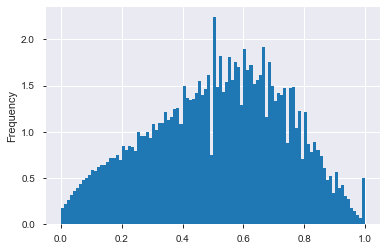

In [13]:
df['completion_rate'].plot.hist(bins=100, normed=True)

zeros = (df['completion_rate']==0).sum()
ones = (df['completion_rate']==0).sum()
print(f'Samples with completion rate equals zero:{zeros}')
print(f'Samples with completion rate equals one:{ones}')
df[['completion_rate']].describe()

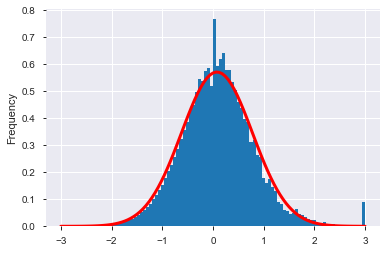

In [14]:
df['logit_completion_rate'].plot.hist(bins=100, normed=True)
outliers = df['logit_completion_rate'] >= MAX_VAL

mean = df['logit_completion_rate'][~outliers].mean()
std = df['logit_completion_rate'][~outliers].std()

x = np.linspace(-MAX_VAL, MAX_VAL, 101)
y = norm(mean,std).pdf(x)
plt.plot(x, y, 'r-', lw=3)

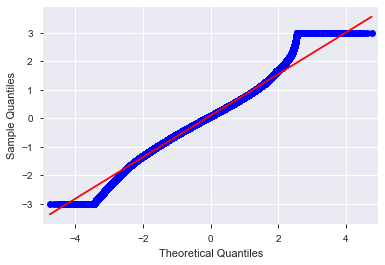

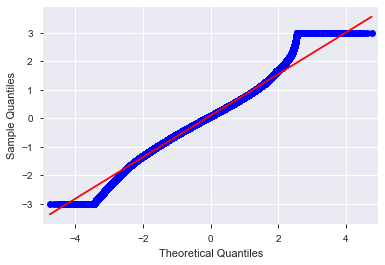

In [15]:
qqplot(df['logit_completion_rate'], line='s')

In [16]:
# Binary, categorical, and ordinal features

fs = ['feat_01','feat_20', 'feat_04', 'feat_08', 'feat_10']

for f in fs:
    print(df.groupby(f).agg({'completion_rate':'mean'}))

         completion_rate
feat_01                 
0.0             0.514985
1.0             0.514563
         completion_rate
feat_20                 
0.0             0.515360
1.0             0.300999
         completion_rate
feat_04                 
0.0             0.515030
1.0             0.387244
2.0             0.390024
3.0             0.317786
5.0             0.232620
         completion_rate
feat_08                 
0.0             0.524327
1.0             0.423671
2.0             0.397569
3.0             0.367209
4.0             0.363772
5.0             0.387601
6.0             0.494324
7.0             0.488071
8.0             0.337896
9.0             0.372524
10.0            0.653077
11.0            0.400000
14.0            0.690909
15.0            0.115044
         completion_rate
feat_10                 
0.0             0.515835
1.0             0.434861
2.0             0.486004
3.0             0.514562
4.0             0.617518
5.0             0.623842
6.0             0.665010


### 3.1 Distribution of target variable amongst duplicates

In [17]:
%%time

total_var = df['completion_rate'].var()

def norm_var(x): 
    return np.var(x) / total_var

df_same_feats = df \
    .groupby(features) \
    .agg({
        'form_id':'count',
        'completion_rate': [
            np.mean,
            np.var,
            np.min,
            np.max,
            norm_var
        ],
        'views': 'sum'
    })
df_same_feats.columns = ['_'.join(col).strip() for col in df_same_feats.columns.values]

df_same_feats = df_same_feats \
    .sort_values('form_id_count', ascending=False)

CPU times: user 48.9 s, sys: 1.08 s, total: 49.9 s
Wall time: 51.3 s


In [18]:
df_same_feats.reset_index().head(50)

feat_01  feat_02  feat_03  feat_04  feat_05  feat_06  feat_07  feat_08  \
0       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2       0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
3       1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4       0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
5       1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
6       1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
7       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
8       0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
9       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
10      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
11      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
12      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
13      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
14      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
15      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
16      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
17      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
18      0.0      2.0      0.0      0.0      0.0      0.0      0.0      0.0   
19      0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
20      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
21      0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
22      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
24      0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
25      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
26      0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
27      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
28      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
29      0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
30      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
31      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
32      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
33      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
34      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
35      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
36      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
37      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
38      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
39      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
40      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
41      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
42      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
43      0.0      2.0      0.0      0.0      0.0      0.0      0.0      0.0   
44      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
45      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
46      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
47      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
48      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
49      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

    feat_09  feat_10  ...

## 4. Outlier detection (kNN-based)

In [ ]:
%%time

from pyod.models.knn import KNN

X = df[features]

clf_name = 'KNN'
clf = KNN()
clf.fit(X)

y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

/Users/yc00055/.virtualenvs/tfcc/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/yc00055/.virtualenvs/tfcc/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
